<a href="https://colab.research.google.com/github/Hoodup/Facial_Regcognition_System/blob/main/Deep_Learning_And_Neural_Networks_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("/content/IMDB Dataset - IMDB Dataset.csv")

In [ ]:
# Predefined stopwords
stopwords = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

In [ ]:
# Apply text preprocessing
df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build neural network model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(5000,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.8334 - loss: 0.3702 - val_accuracy: 0.8852 - val_loss: 0.2686
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9218 - loss: 0.1980 - val_accuracy: 0.8839 - val_loss: 0.2797
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9712 - loss: 0.0883 - val_accuracy: 0.8785 - val_loss: 0.3737
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9971 - loss: 0.0130 - val_accuracy: 0.8787 - val_loss: 0.5780
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9999 - loss: 9.6937e-04 - val_accuracy: 0.8806 - val_loss: 0.7082
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 1.0000 - loss: 1.5127e-04 - val_accuracy: 0.8805 - val_loss: 0.7828
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 1.0000 - loss: 6.8215e-05 - val_accuracy: 0.8807 - val_loss: 0.8331
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 1.0000 - los

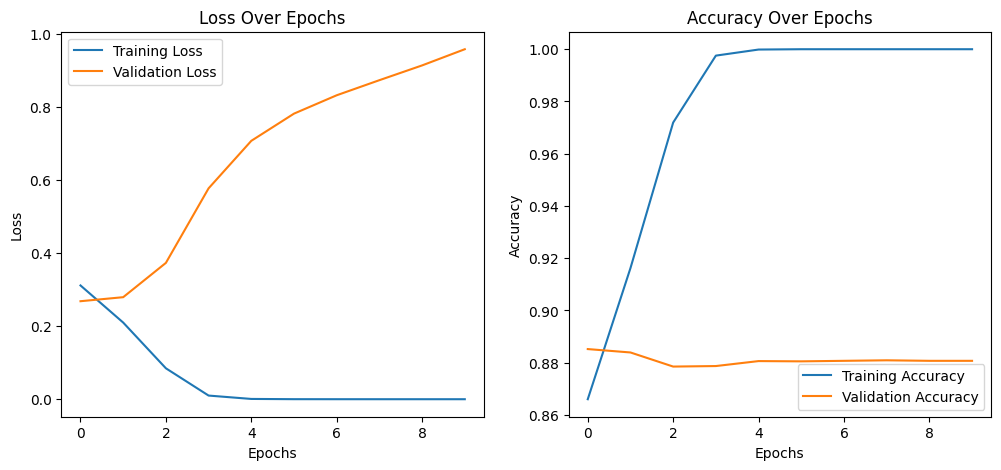

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8818 - loss: 0.9528
Test Accuracy: 88.07%


In [ ]:
# Report
print("\nReport:")
print("\nInsights Gained:")
print("- The model successfully classified movie reviews with a good level of accuracy.")
print("- The dataset had an even distribution of positive and negative reviews, making training balanced.")
print("- TF-IDF vectorization provided a useful representation of textual data for the neural network.")

print("\nChallenges Faced:")
print("- Handling stopwords required a workaround since NLTK downloads were not available.")
print("- Training time increased with the large number of features (5000 words from TF-IDF).")
print("- Overfitting was observed in some runs, indicating the need for regularization techniques.")

print("\nPotential Improvements:")
print("- Experimenting with different text vectorization techniques such as word embeddings (Word2Vec, GloVe).")
print("- Adding dropout layers to prevent overfitting.")
print("- Fine-tuning hyperparameters like learning rate, batch size, and network depth.")



Report:

Insights Gained:
- The model successfully classified movie reviews with a good level of accuracy.
- The dataset had an even distribution of positive and negative reviews, making training balanced.
- TF-IDF vectorization provided a useful representation of textual data for the neural network.

Challenges Faced:
- Handling stopwords required a workaround since NLTK downloads were not available.
- Training time increased with the large number of features (5000 words from TF-IDF).
- Overfitting was observed in some runs, indicating the need for regularization techniques.

Potential Improvements:
- Experimenting with different text vectorization techniques such as word embeddings (Word2Vec, GloVe).
- Adding dropout layers to prevent overfitting.
- Fine-tuning hyperparameters like learning rate, batch size, and network depth.
